# Optimal Skills

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_ind= df[(df['job_title_short']=='Data Scientist') & (df['job_country']== 'India')].copy()
df_ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
239,Data Scientist,Power BI Data Analytics & Data Scientist,"Maharashtra, India",via Shine,Full-time,False,India,2023-11-11 13:10:08,False,False,India,None,NaN,NaN,Emerson,[power bi],{'analyst_tools': ['power bi']}
323,Data Scientist,Forecasting Analyst,Anywhere,via LinkedIn,Full-time,True,India,2023-09-28 13:48:45,False,False,India,None,NaN,NaN,Straive,[excel],{'analyst_tools': ['excel']}
389,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Contractor,False,India,2023-09-12 13:16:27,False,False,India,None,NaN,NaN,Digital India Corporation,"[sql, sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785591,Data Scientist,Data Scientist T8,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-01 06:29:03,False,False,India,None,NaN,NaN,Mercedes-Benz Research and Development India P...,"[java, python, aws, azure, kubernetes, docker,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
785645,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,India,2023-01-20 06:51:23,False,False,India,None,NaN,NaN,TwiLearn EduTech Pvt. Ltd.,"[python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785654,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,None,True,India,2023-01-31 06:11:46,False,False,India,None,NaN,NaN,Corizo,[zoom],{'sync': ['zoom']}
785674,Data Scientist,Data Scientist,"Kolkata, West Bengal, India",via LinkedIn,Full-time,False,India,2023-01-12 06:12:32,False,False,India,None,NaN,NaN,One Billion Ideas Pvt. LTD.,"[r, python, sql, scala, java, c++, matplotlib,...","{'analyst_tools': ['tableau'], 'libraries': ['..."


In [6]:
df_ind=df_ind.dropna(subset=['salary_year_avg'])
df_ind_exploded=df_ind.explode('job_skills')
df_ind_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
3930,114516.0,python
3930,114516.0,r
3930,114516.0,c++
3930,114516.0,tensorflow
3930,114516.0,tableau


In [18]:
df_ind_skills=df_ind_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_ind_skills=df_ind_skills.rename(columns={'count':'skill_count','median':'median_salary'})
df_ind_count=len(df_ind)

df_ind_skills['skill_percent']=df_ind_skills['skill_count']/df_ind_count*100
skill_percent= 8

df_ind_skills_high_demand=df_ind_skills[df_ind_skills['skill_percent']>skill_percent]
df_ind_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,64,152500.00,69.565217
sql,49,113500.00,53.260870
r,30,129758.00,32.608696
spark,23,93600.00,25.000000
aws,20,103550.00,21.739130
tableau,19,113500.00,20.652174
tensorflow,16,136008.00,17.391304
azure,15,157500.00,16.304348
hadoop,14,87717.75,15.217391


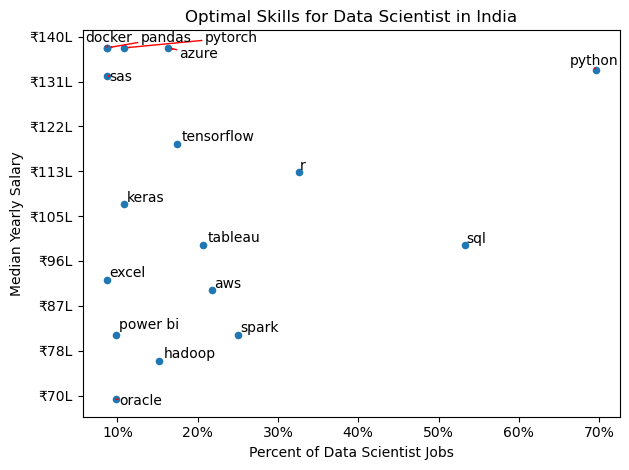

In [23]:
from adjustText import adjust_text

df_ind_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts= []
for i, txt in enumerate(df_ind_skills_high_demand.index):
    texts.append(plt.text(df_ind_skills_high_demand['skill_percent'].iloc[i], df_ind_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))


plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Optimal Skills for Data Scientist in India')

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'₹{int(x*87.5/100000)}L'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))

plt.tight_layout()
plt.show()